In [97]:
import numpy as np
import pylab as plt
import networkx as nx

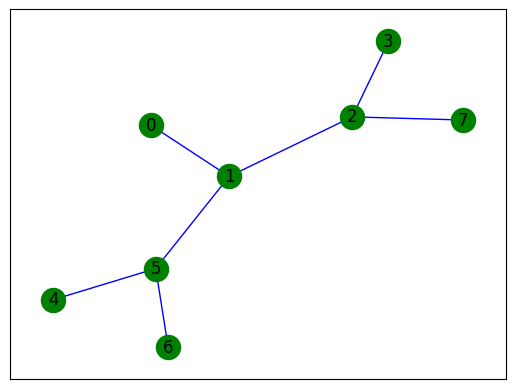

In [98]:
#Initializing points
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
 
goal = 7
mapping={0:'Start', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7-Destination'}
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G,k=.5,center=points_list[2])
nx.draw_networkx_nodes(G,pos,node_color='g')
nx.draw_networkx_edges(G,pos,edge_color='b')
nx.draw_networkx_labels(G,pos)
plt.show()

In [99]:
NO_OF_POINTS = 8
 
#Inititlaizing R Matrix
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1
 
for point in points_list:
    print(point)
    if point[1] == goal:
     R[point] = 150
    else:
     R[point] = 0
 
if point[0] == goal:
  R[point[::-1]] = 150
else:
  R[point[::-1]]= 0

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [100]:
R[goal,goal]= 150 

# R matrix
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1., 150.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.]])

In [101]:
# Q matrix
Q = np.matrix (np.zeros([NO_OF_POINTS,NO_OF_POINTS]))
print(Q)
# Gamma (learning parameter)
gamma = 0.8
# Initial state (Usually to be chosen at random)
initial_state = 1

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [102]:
# function returns all available actions 
def available_actions(state):
   current_state_row = R[state,]
   av_act = np.where(current_state_row >= 0)[1]
   return av_act
 
 
# Get available actions in the current state 
available_act = available_actions(initial_state)



In [103]:
# function chooses at random which action to be performed within the range 
# of all the available actions.

def sample_next_action(available_actions_range):
   next_action = int(np.random.choice(available_act,1))
   return next_action


# Sample next action to be performed 
action = sample_next_action(available_act)

In [104]:

def update(current_state, action, gamma):
 
   max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
 
   if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
   else:
      max_index = int(max_index)
   max_value = Q[action, max_index]
   
    
   # Q learning formula
   Q[current_state, action] = R[current_state, action] + gamma * max_value
   
   print('max_value', R[current_state, action] + gamma * max_value)
 
   if (np.max(Q) > 0):
       return(np.sum(Q/np.max(Q)*100))
   else:
      return (0)
 
update(initial_state, action, gamma)

max_value 0.0


0

In [105]:
# Training
scores = []

for i in range(700):
    current_state = np.random.randint(0,int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    update(current_state,action,gamma)

max_value 0.0
max_value 0.0


ValueError: 'a' cannot be empty unless no samples are taken

In [ ]:
print ('Score:', str(score))
 
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

In [ ]:
 
# Testing
current_state = 0
steps = [current_state]
 
while current_state != 7:
 
  next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
 
  if next_step_index.shape[0] > 1:
    next_step_index = int(np.random.choice(next_step_index, size = 1))
  else:
    next_step_index = int(next_step_index)
    
  steps.append(next_step_index)
  current_state = next_step_index

In [ ]:
# Print selected sequence of steps
print("Selected path:")

print(steps)

In [ ]:
plt.plot(scores)
plt.show()